<h1 style="text-align: center;">Decision Tree Project</h1>

<h2 style="text-align: center;">Name: Javad Pourrafi</h2>

### Packages

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import time
from itertools import product

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import plot_tree
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Dataset Loading

In [2]:
data = pd.read_csv(r"C:\Users\JoJo\Desktop\Term 8\AI Course\hotel_bookings.csv")

In [3]:
print(data.columns)
data.head(n=5)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
null = pd.DataFrame({'Null Values' : data.isna().sum(), 'Percentage Null Values' : (data.isna().sum()) / (data.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


In [6]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Data Cleaning

In [7]:
# Null Values
data.fillna(0, inplace = True)

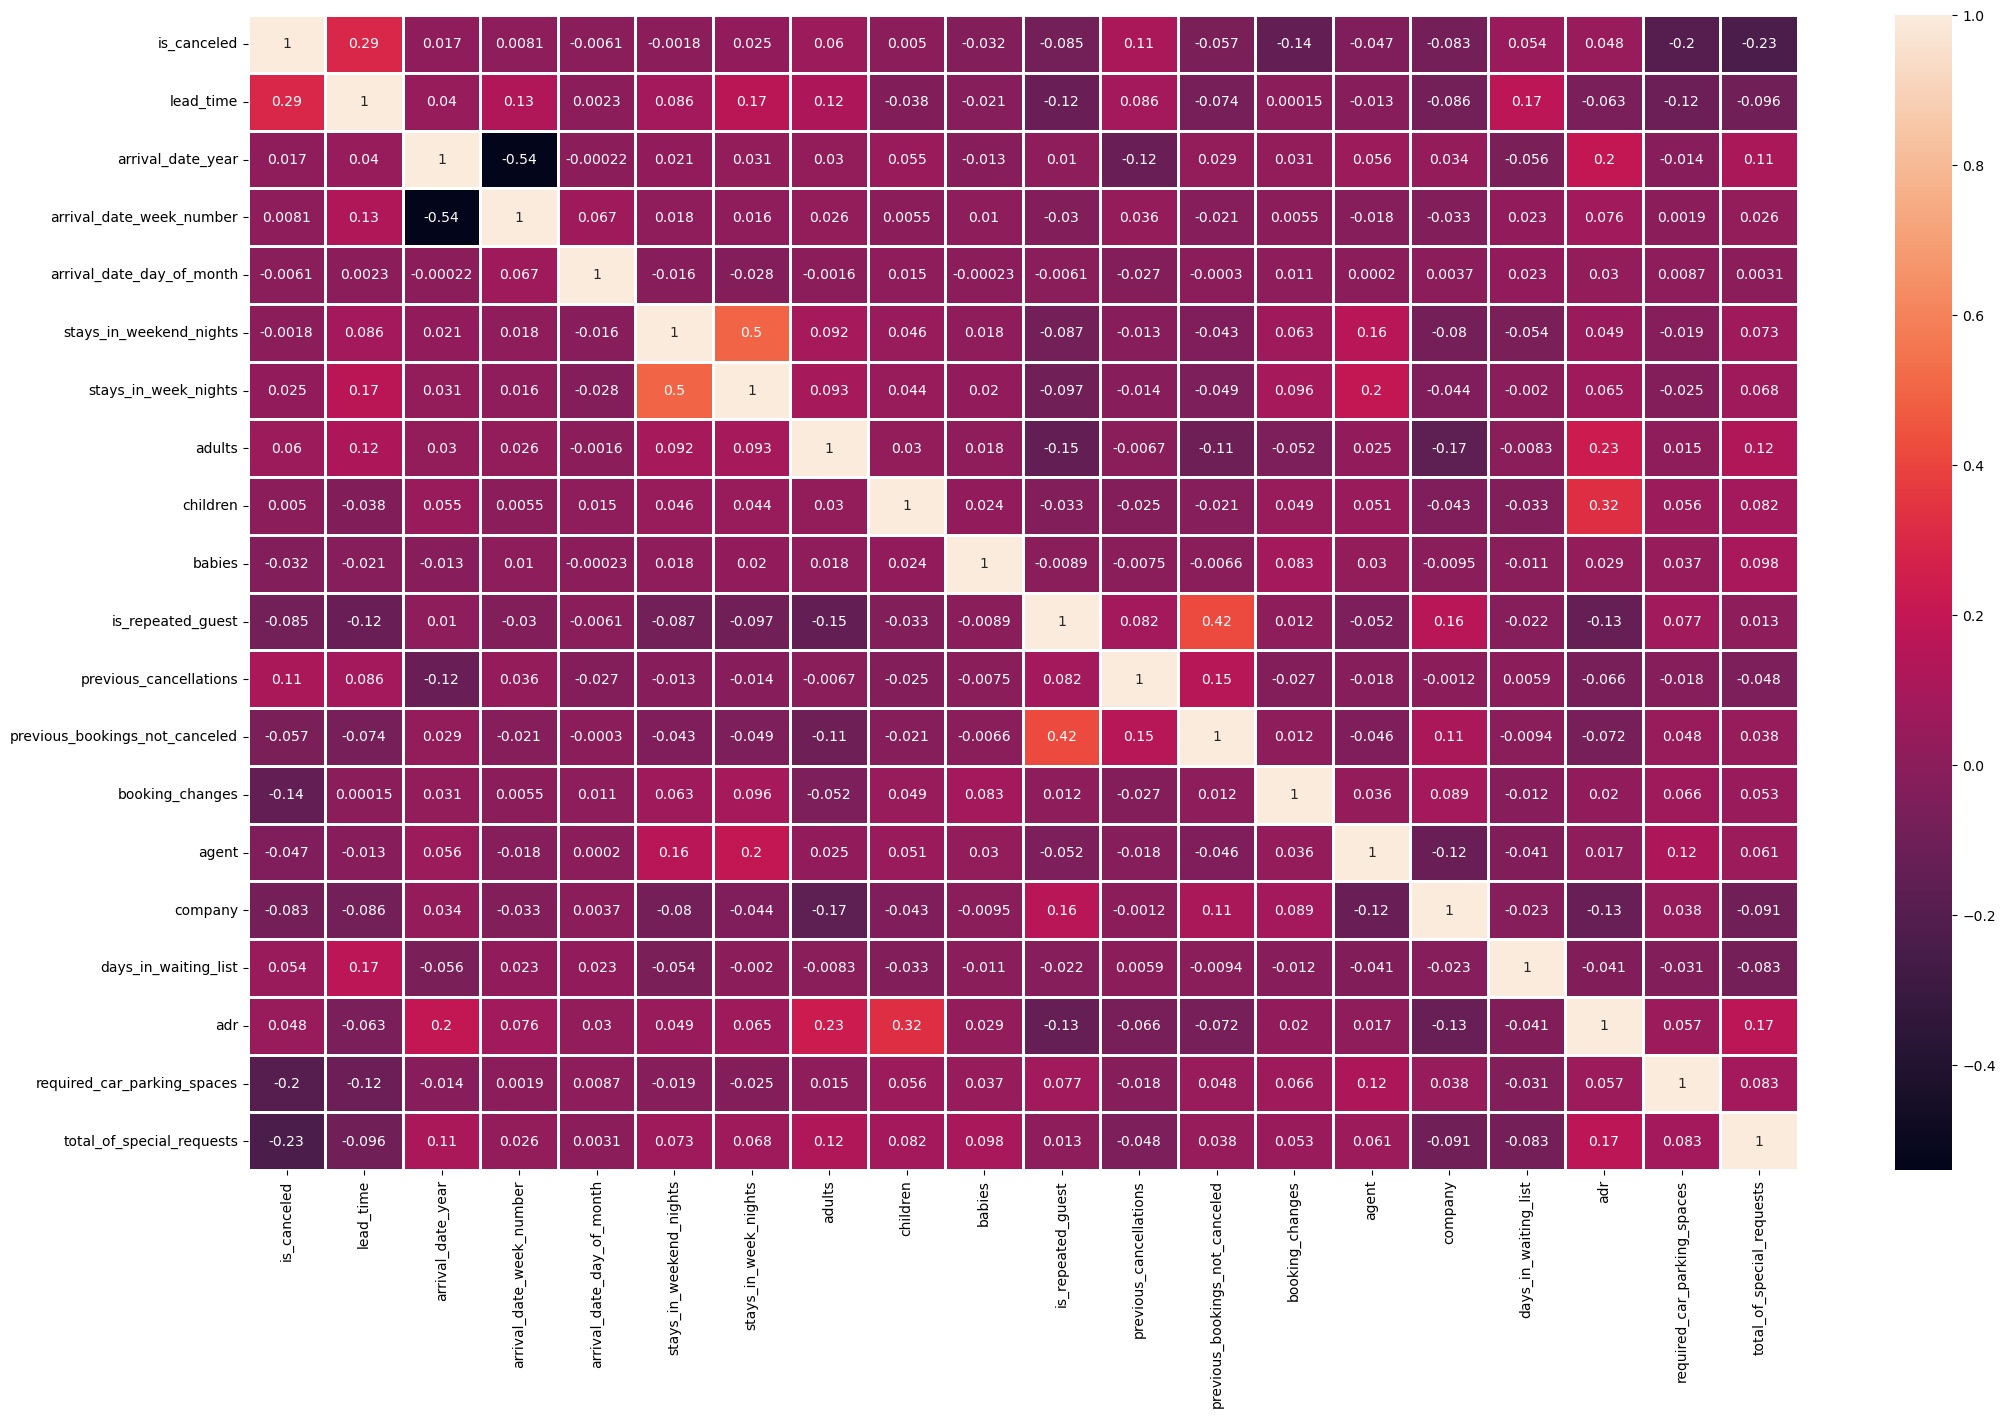

In [8]:
numeric_data = data.select_dtypes(include=[np.number])

plt.figure(figsize=(25, 15))

corr = numeric_data.corr()
sns.heatmap(corr, annot=True, linewidths=1)
plt.show()

In [9]:
correlation = numeric_data.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
company                           0.082995
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
agent                             0.046529
babies                            0.032491
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005036
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

In [10]:
# Dropping columns with low correlation
useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

data.drop(useless_col, axis = 1, inplace = True)

In [11]:
# Encoding
cat_cols=list(data.select_dtypes(['object']).columns)
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [12]:
cat_df = data[cat_cols]
cat_df.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [13]:
# Reservation Status Time
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])
cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day
cat_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

# Assigning numerical values to categorical data
cat_df[['hotel', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'deposit_type', 'customer_type', 'year', 'month', 'day'
       ]] = cat_df[['hotel', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'deposit_type', 'customer_type', 'year', 'month', 'day'
       ]].apply(LabelEncoder().fit_transform)

cat_df


C:\Users\JoJo\AppData\Local\Temp\ipykernel_17180\2236228236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])
C:\Users\JoJo\AppData\Local\Temp\ipykernel_17180\2236228236.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['year'] = cat_df['reservation_status_date'].dt.year
C:\Users\JoJo\AppData\Local\Temp\ipykernel_17180\2236228236.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,1,0,3,1,2,0,2,1,6,0
1,1,0,3,1,2,0,2,1,6,0
2,1,0,3,1,0,0,2,1,6,1
3,1,0,2,0,0,0,2,1,6,1
4,1,0,6,3,0,0,2,1,6,2
...,...,...,...,...,...,...,...,...,...,...
119385,0,0,5,3,0,0,2,3,8,5
119386,0,0,6,3,4,0,2,3,8,6
119387,0,0,6,3,3,0,2,3,8,6
119388,0,0,6,3,0,0,2,3,8,6


In [14]:
cat_df.head(n=15)

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,1,0,3,1,2,0,2,1,6,0
1,1,0,3,1,2,0,2,1,6,0
2,1,0,3,1,0,0,2,1,6,1
3,1,0,2,0,0,0,2,1,6,1
4,1,0,6,3,0,0,2,1,6,2
5,1,0,6,3,0,0,2,1,6,2
6,1,0,3,1,2,0,2,1,6,2
7,1,1,3,1,2,0,2,1,6,2
8,1,0,6,3,0,0,2,1,4,5
9,1,2,5,3,3,0,2,1,3,21


In [15]:
# Numerical Data
num_df = data.drop(columns = cat_cols, axis = 1)
num_df.drop(['is_canceled', 'agent', 'adr', 'arrival_date_day_of_month' ], axis = 1, inplace = True)
num_df

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,company,required_car_parking_spaces,total_of_special_requests
0,342,27,0,0,2,0.0,0,0,0,0,0.0,0,0
1,737,27,0,0,2,0.0,0,0,0,0,0.0,0,0
2,7,27,0,1,1,0.0,0,0,0,0,0.0,0,0
3,13,27,0,1,1,0.0,0,0,0,0,0.0,0,0
4,14,27,0,2,2,0.0,0,0,0,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,2,5,2,0.0,0,0,0,0,0.0,0,0
119386,102,35,2,5,3,0.0,0,0,0,0,0.0,0,2
119387,34,35,2,5,2,0.0,0,0,0,0,0.0,0,4
119388,109,35,2,5,2,0.0,0,0,0,0,0.0,0,0


In [16]:
num_df.var()

lead_time                         11419.721511
arrival_date_week_number            185.099790
stays_in_weekend_nights               0.997229
stays_in_week_nights                  3.641554
adults                                0.335543
children                              0.158846
babies                                0.009494
is_repeated_guest                     0.030894
previous_cancellations                0.712904
previous_bookings_not_canceled        2.242317
company                            2909.942594
required_car_parking_spaces           0.060168
total_of_special_requests             0.628529
dtype: float64

In [17]:
# Lead Time
num_df.loc[num_df['lead_time'] == 0, 'lead_time'] = 0
num_df.loc[(num_df['lead_time'] > 0) & (num_df['lead_time'] <= 30), 'lead_time'] = 1
num_df.loc[(num_df['lead_time'] > 30) & (num_df['lead_time'] <= 60), 'lead_time'] = 2
num_df.loc[(num_df['lead_time'] > 60) & (num_df['lead_time'] <= 120), 'lead_time'] = 3
num_df.loc[(num_df['lead_time'] > 120) & (num_df['lead_time'] <= 180), 'lead_time'] = 4
num_df.loc[(num_df['lead_time'] > 180) & (num_df['lead_time'] <= 240), 'lead_time'] = 5
num_df.loc[(num_df['lead_time'] > 240) & (num_df['lead_time'] <= 300), 'lead_time'] = 6
num_df.loc[(num_df['lead_time'] > 300) & (num_df['lead_time'] <= 360), 'lead_time'] = 7
num_df.loc[num_df['lead_time'] > 360, 'lead_time'] = 8

num_df.head(15)

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,company,required_car_parking_spaces,total_of_special_requests
0,7,27,0,0,2,0.0,0,0,0,0,0.0,0,0
1,8,27,0,0,2,0.0,0,0,0,0,0.0,0,0
2,1,27,0,1,1,0.0,0,0,0,0,0.0,0,0
3,1,27,0,1,1,0.0,0,0,0,0,0.0,0,0
4,1,27,0,2,2,0.0,0,0,0,0,0.0,0,1
5,1,27,0,2,2,0.0,0,0,0,0,0.0,0,1
6,0,27,0,2,2,0.0,0,0,0,0,0.0,0,0
7,1,27,0,2,2,0.0,0,0,0,0,0.0,0,1
8,3,27,0,3,2,0.0,0,0,0,0,0.0,0,1
9,3,27,0,3,2,0.0,0,0,0,0,0.0,0,0


In [18]:
print(num_df['previous_bookings_not_canceled'].unique())
num_df.loc[num_df['previous_bookings_not_canceled'] > 0, 'previous_bookings_not_canceled'] = 1
num_df.head(15)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24
 25 27 28 29 30 19 26 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]


,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,company,required_car_parking_spaces,total_of_special_requests
0,7,27,0,0,2,0.0,0,0,0,0,0.0,0,0
1,8,27,0,0,2,0.0,0,0,0,0,0.0,0,0
2,1,27,0,1,1,0.0,0,0,0,0,0.0,0,0
3,1,27,0,1,1,0.0,0,0,0,0,0.0,0,0
4,1,27,0,2,2,0.0,0,0,0,0,0.0,0,1
5,1,27,0,2,2,0.0,0,0,0,0,0.0,0,1
6,0,27,0,2,2,0.0,0,0,0,0,0.0,0,0
7,1,27,0,2,2,0.0,0,0,0,0,0.0,0,1
8,3,27,0,3,2,0.0,0,0,0,0,0.0,0,1
9,3,27,0,3,2,0.0,0,0,0,0,0.0,0,0


In [19]:
num_df['company'] = num_df['company'].apply(lambda x: 1 if x != 0 else 0)
num_df.head(15)

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,company,required_car_parking_spaces,total_of_special_requests
0,7,27,0,0,2,0.0,0,0,0,0,0,0,0
1,8,27,0,0,2,0.0,0,0,0,0,0,0,0
2,1,27,0,1,1,0.0,0,0,0,0,0,0,0
3,1,27,0,1,1,0.0,0,0,0,0,0,0,0
4,1,27,0,2,2,0.0,0,0,0,0,0,0,1
5,1,27,0,2,2,0.0,0,0,0,0,0,0,1
6,0,27,0,2,2,0.0,0,0,0,0,0,0,0
7,1,27,0,2,2,0.0,0,0,0,0,0,0,1
8,3,27,0,3,2,0.0,0,0,0,0,0,0,1
9,3,27,0,3,2,0.0,0,0,0,0,0,0,0


In [20]:
num_df.loc[num_df['arrival_date_week_number'] <= 8, 'arrival_date_week_number'] = 0
num_df.loc[(num_df['arrival_date_week_number'] > 8) & (num_df['arrival_date_week_number'] <= 16), 'arrival_date_week_number'] = 1
num_df.loc[(num_df['arrival_date_week_number'] > 16) & (num_df['arrival_date_week_number'] <= 24), 'arrival_date_week_number'] = 2
num_df.loc[(num_df['arrival_date_week_number'] > 24) & (num_df['arrival_date_week_number'] <= 32), 'arrival_date_week_number'] = 3
num_df.loc[(num_df['arrival_date_week_number'] > 32) & (num_df['arrival_date_week_number'] <= 40), 'arrival_date_week_number'] = 4
num_df.loc[(num_df['arrival_date_week_number'] > 40) & (num_df['arrival_date_week_number'] <= 48), 'arrival_date_week_number'] = 5
num_df.loc[num_df['arrival_date_week_number'] > 48, 'arrival_date_week_number'] = 6

In [21]:
num_df.var()

lead_time                         3.996420
arrival_date_week_number          2.977795
stays_in_weekend_nights           0.997229
stays_in_week_nights              3.641554
adults                            0.335543
children                          0.158846
babies                            0.009494
is_repeated_guest                 0.030894
previous_cancellations            0.712904
previous_bookings_not_canceled    0.029402
company                           0.053690
required_car_parking_spaces       0.060168
total_of_special_requests         0.628529
dtype: float64

In [22]:
num_df.head(15)

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,company,required_car_parking_spaces,total_of_special_requests
0,7,3,0,0,2,0.0,0,0,0,0,0,0,0
1,8,3,0,0,2,0.0,0,0,0,0,0,0,0
2,1,3,0,1,1,0.0,0,0,0,0,0,0,0
3,1,3,0,1,1,0.0,0,0,0,0,0,0,0
4,1,3,0,2,2,0.0,0,0,0,0,0,0,1
5,1,3,0,2,2,0.0,0,0,0,0,0,0,1
6,0,3,0,2,2,0.0,0,0,0,0,0,0,0
7,1,3,0,2,2,0.0,0,0,0,0,0,0,1
8,3,3,0,3,2,0.0,0,0,0,0,0,0,1
9,3,3,0,3,2,0.0,0,0,0,0,0,0,0


In [23]:
X = pd.concat([cat_df, num_df], axis = 1)
y = data['is_canceled']

In [24]:
X.shape, y.shape

((119390, 23), (119390,))

In [25]:
X.head(15)

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,...,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,company,required_car_parking_spaces,total_of_special_requests
0,1,0,3,1,2,0,2,1,6,0,...,0,2,0.0,0,0,0,0,0,0,0
1,1,0,3,1,2,0,2,1,6,0,...,0,2,0.0,0,0,0,0,0,0,0
2,1,0,3,1,0,0,2,1,6,1,...,1,1,0.0,0,0,0,0,0,0,0
3,1,0,2,0,0,0,2,1,6,1,...,1,1,0.0,0,0,0,0,0,0,0
4,1,0,6,3,0,0,2,1,6,2,...,2,2,0.0,0,0,0,0,0,0,1
5,1,0,6,3,0,0,2,1,6,2,...,2,2,0.0,0,0,0,0,0,0,1
6,1,0,3,1,2,0,2,1,6,2,...,2,2,0.0,0,0,0,0,0,0,0
7,1,1,3,1,2,0,2,1,6,2,...,2,2,0.0,0,0,0,0,0,0,1
8,1,0,6,3,0,0,2,1,4,5,...,3,2,0.0,0,0,0,0,0,0,1
9,1,2,5,3,3,0,2,1,3,21,...,3,2,0.0,0,0,0,0,0,0,0


### Spliting Data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20 , random_state=42)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((95512, 23), (23878, 23), (95512,), (23878,))

In [28]:
X_train.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,...,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,company,required_car_parking_spaces,total_of_special_requests
67702,0,0,6,3,3,0,2,3,2,12,...,1,3,0.0,0,0,0,0,0,0,0
115851,0,0,3,1,0,0,2,3,6,11,...,1,2,1.0,0,0,0,0,0,0,0
57345,0,0,6,3,5,0,2,2,8,15,...,1,2,2.0,0,0,0,0,0,0,0
11622,1,0,3,1,4,0,2,2,8,11,...,4,2,0.0,0,0,0,0,0,0,1
33333,1,0,6,3,3,0,2,3,1,19,...,1,2,0.0,0,0,0,0,0,0,1


In [29]:
X_test.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,...,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,company,required_car_parking_spaces,total_of_special_requests
30946,1,0,3,1,5,0,2,2,11,8,...,5,2,0.0,0,0,0,0,0,0,0
40207,0,0,6,3,0,0,2,1,6,15,...,3,2,0.0,0,0,0,0,0,0,0
103708,0,0,5,3,0,0,3,2,11,29,...,3,3,0.0,0,0,0,0,0,0,1
85144,0,0,6,3,0,0,3,2,2,9,...,1,1,0.0,0,0,0,0,0,0,0
109991,0,3,6,3,0,0,2,3,3,19,...,2,2,0.0,0,0,0,0,0,0,0


In [30]:
y_train.head(), y_test.head()

(67702     1
 115851    0
 57345     1
 11622     1
 33333     0
 Name: is_canceled, dtype: int64,
 30946     0
 40207     1
 103708    0
 85144     0
 109991    0
 Name: is_canceled, dtype: int64)

### Decision Tree SKLearn (Just to test data)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc = DecisionTreeClassifier(min_samples_split=10, max_depth=17, random_state=42)
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

train_predictions  = dtc.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy : {train_accuracy}")
print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Training Accuracy : 0.9184814473574001
Accuracy Score of Decision Tree is : 0.9030488315604323
Confusion Matrix : 
[[14456   451]
 [ 1864  7107]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     14907
           1       0.94      0.79      0.86      8971

    accuracy                           0.90     23878
   macro avg       0.91      0.88      0.89     23878
weighted avg       0.91      0.90      0.90     23878



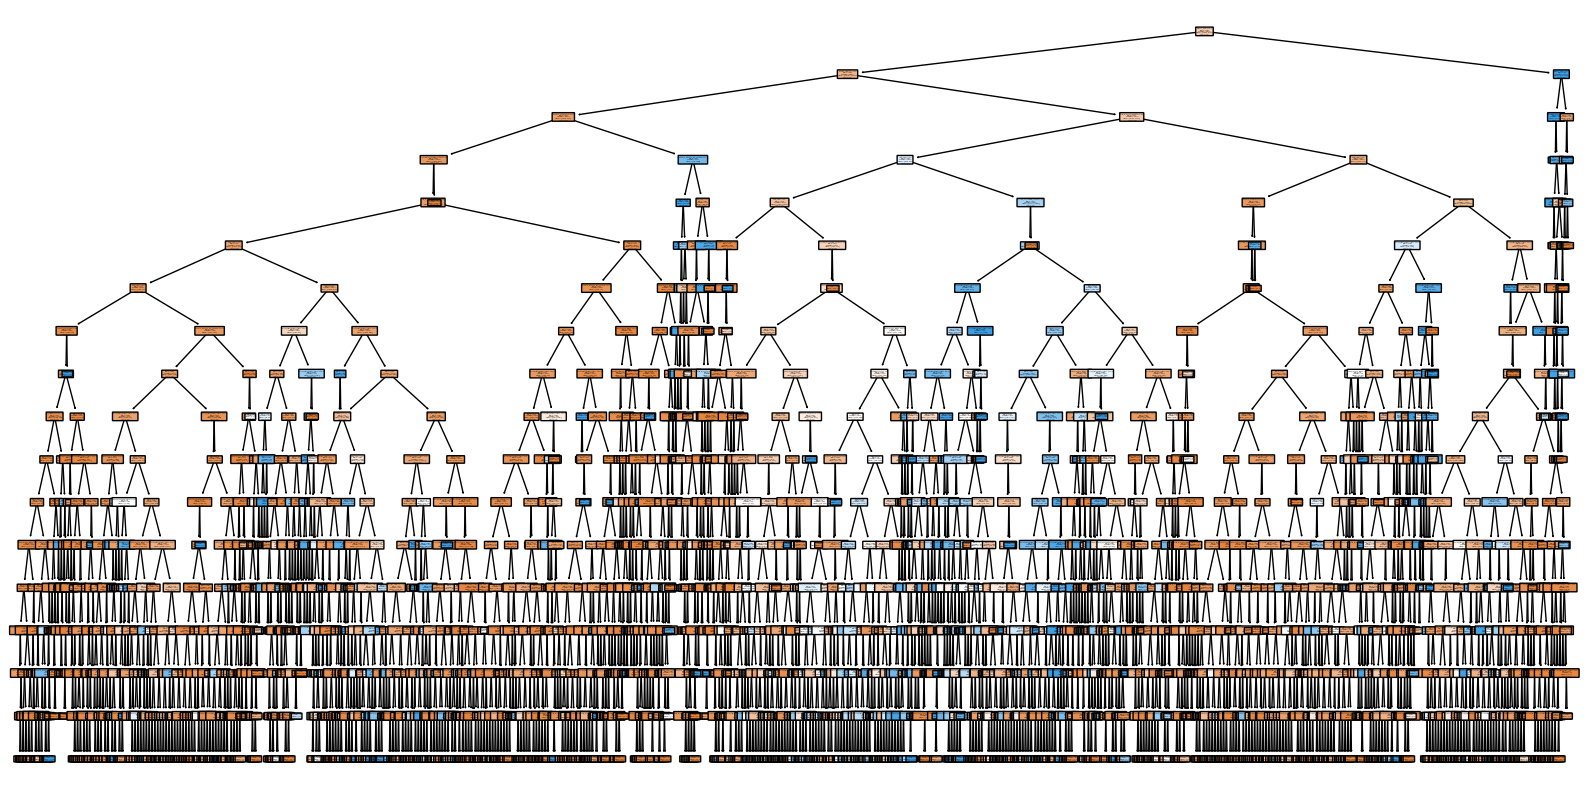

In [134]:
plt.figure(figsize=(20, 10))
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=True, rounded=True)
plt.show()

### Decision Tree

In [47]:
class Node():
    def __init__(self, feature_index=None, thresholds=None, children=None, info_gain=None, value=None):
        self.feature_index = feature_index
        self.thresholds = thresholds
        self.children = children
        self.info_gain = info_gain
        self.value = value



class DecisionTreeClassifier():
    def __init__(self, min_sample_split=2, max_depth=2, num_splits=3):
        self.root = None
        self.min_sample_split = min_sample_split
        self.max_depth = max_depth
        self.num_splits = num_splits  

    def build_tree(self, dataset, curr_depth=0):
        X, Y = dataset[:, :-1], dataset[:, -1]
        num_samples, num_features = np.shape(X)
        
        if num_samples == 0:                                                                # Zero sample Expectation
            return Node(value=0)

        if num_samples >= self.min_sample_split and curr_depth <= self.max_depth:
            best_split = self.get_best_split(dataset, num_samples, num_features)
            if best_split["info_gain"] > 0:
                if all(len(subset) > 0 for subset in best_split["datasets"]):               # heck subsets are not empty
                    children = [self.build_tree(subset, curr_depth + 1) for subset in best_split["datasets"]]
                    return Node(feature_index=best_split["feature_index"], thresholds=best_split["thresholds"], 
                                children=children, info_gain=best_split["info_gain"])

        leaf_value = self.calculate_leaf_value(Y)
        return Node(value=leaf_value)


    def get_best_split(self, dataset, num_samples, num_features):
        best_split = {"info_gain": -float("inf")}
        
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            
            if len(possible_thresholds) <= 1:                                               # expect at least 2 unique values 
                continue
                
            thresholds = []
            if self.num_splits == 1:
                thresholds = [np.median(feature_values)]
            else:
                percentiles = np.linspace(0, 100, self.num_splits + 1)[1:-1]
                thresholds = [np.percentile(feature_values, p) for p in percentiles]
                
                thresholds = sorted(set(thresholds))                                        # Remove duplicate thresholds
                
                if not thresholds:                                                          # Few thresholds Expectation
                    thresholds = [np.median(feature_values)]
            
            subsets = self.split(dataset, feature_index, thresholds)
            
            if any(len(subset) == 0 for subset in subsets):                                 # Empty subset expectation
                continue
            
            ig = self.information_gain(dataset[:, -1], [subset[:, -1] for subset in subsets])
            
            if ig > best_split["info_gain"]:                                                # Update best_split
                best_split = {
                    "feature_index": feature_index,
                    "thresholds": thresholds,
                    "info_gain": ig,
                    "datasets": subsets
                }
                
        if best_split["info_gain"] == -float("inf"):                                        # If no valid split found Return default
            return {
                "feature_index": 0,
                "thresholds": [np.median(dataset[:, 0])],
                "info_gain": 0,
                "datasets": [dataset] 
            }
                
        return best_split

    def split(self, dataset, feature_index, thresholds):
        subsets = []
        feature_values = dataset[:, feature_index]
        
        for i in range(len(thresholds) + 1):                                                 # subsets based on thresholds
            if i == 0:                                                                       # First subset
                indices = np.where(feature_values <= thresholds[i])[0] 
            elif i == len(thresholds):                                                       # Last subset
                indices = np.where(feature_values > thresholds[i-1])[0]
            else:                                                                            # Middle subsets
                indices = np.where((feature_values > thresholds[i-1]) & 
                                  (feature_values <= thresholds[i]))[0]
            
            subsets.append(dataset[indices])
            
        return subsets

    def information_gain(self, parent, children, mode="entropy"):
        children = [child for child in children if len(child) > 0]                           # Handle empty children
        if not children:
            return 0
            
        parent_info = self.entropy(parent) if mode == "entropy" else self.gini_index(parent) #parnet entropy or gini
        
        total_samples = len(parent)
        weighted_child_info = sum((len(child) / total_samples) * 
                                  (self.entropy(child) if mode == "entropy" else self.gini_index(child)) 
                                  for child in children)
        
        gain = parent_info - weighted_child_info

        return gain

    def entropy(self, y):
        if len(y) == 0:
            return 0
            
        class_labels = np.unique(y)
        entropy = 0
        
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls + 1e-10)                                      # small const to avoid log(0)
            
        return entropy

    def gini_index(self, y):
        if len(y) == 0:                                                                     # Empty array Expectation
            return 0
            
        class_labels = np.unique(y)
        gini = 1
        
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini -= p_cls ** 2
            
        return gini

    def calculate_leaf_value(self, Y):
        if len(Y) == 0:                                                                     # Empty array Expectation
            return 0

        unique_classes, counts = np.unique(Y, return_counts=True)
        return unique_classes[np.argmax(counts)]

    def print_tree(self, tree=None, indent=""):
        if not tree:
            tree = self.root
            
        if tree.value is not None:
            print(indent + "Leaf: " + str(tree.value))
            return
            
        print(indent + "Feature " + str(tree.feature_index))
        
        for i, child in enumerate(tree.children):
            if i == 0:
                print(indent + "├── Value ≤ " + str(tree.thresholds[i]) + ":")
            elif i == len(tree.children) - 1:
                print(indent + "└── Value > " + str(tree.thresholds[i-1]) + ":")
            else:
                print(indent + "├── " + str(tree.thresholds[i-1]) + " < Value ≤ " + str(tree.thresholds[i]) + ":")
            
            self.print_tree(child, indent + "    ")

    def fit(self, X, Y):
        X = np.array(X)
        Y = np.array(Y)
        dataset = np.column_stack((X, Y))
        self.root = self.build_tree(dataset)

    def predict(self, X):
        X = np.array(X)
            
        if len(X.shape) == 1:                                                               # single sample
            return self.make_prediction(X, self.root)
        
        return np.array([self.make_prediction(x, self.root) for x in X])                    # multiple samples

    def make_prediction(self, x, tree):
        if tree.value is not None:                                                          # Leaf node
            return tree.value

        feature_val = x[tree.feature_index]

        for i, threshold in enumerate(tree.thresholds): 
            if feature_val <= threshold:
                return self.make_prediction(x, tree.children[i])

        return self.make_prediction(x, tree.children[-1])

In [48]:
clf = DecisionTreeClassifier(min_sample_split=10, max_depth=13)
clf.fit(X_train, y_train)

In [49]:
print("Decision Tree Structure:")
clf.print_tree()

Decision Tree Structure:
Feature 5
├── Value ≤ 0.0:
    Feature 21
    ├── Value ≤ 0.0:
        Feature 2
        ├── Value ≤ 5.0:
            Feature 18
            ├── Value ≤ 0.0:
                Feature 22
                ├── Value ≤ 0.0:
                    Feature 10
                    ├── Value ≤ 1.0:
                        Feature 19
                        ├── Value ≤ 0.0:
                            Feature 11
                            ├── Value ≤ 1.0:
                                Feature 12
                                ├── Value ≤ 0.0:
                                    Feature 13
                                    ├── Value ≤ 1.0:
                                        Feature 17
                                        ├── Value ≤ 0.0:
                                            Feature 6
                                            ├── Value ≤ 2.0:
                                                Feature 20
                                                ├── Val

Training accuracy: 0.9098
Test accuracy: 0.8812

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     14907
           1       0.90      0.77      0.83      8971

    accuracy                           0.88     23878
   macro avg       0.89      0.86      0.87     23878
weighted avg       0.88      0.88      0.88     23878



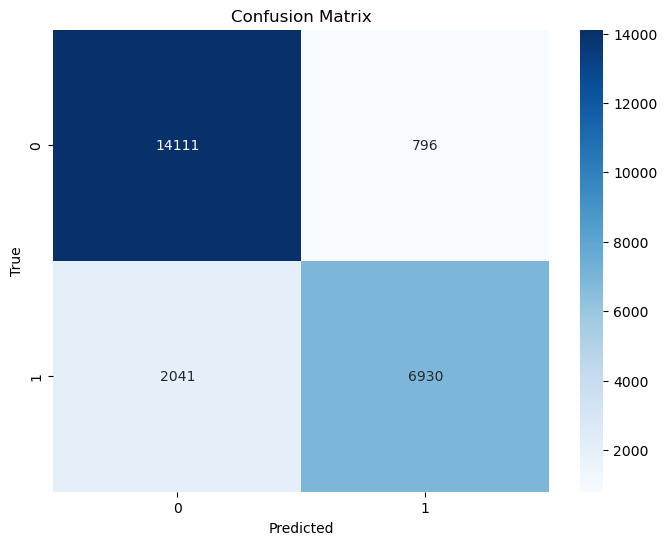

In [56]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y), 
            yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Grid Search for Parameter Tuning

In [68]:
def grid_search_cv(X_train, X_test, y_train, y_test, param_grid, verbose=True):
    best_params = None
    best_test_score = -float('inf')
    all_results = []
    
    keys = param_grid.keys()
    param_combinations = [dict(zip(keys, v)) for v in product(*param_grid.values())]
    
    if verbose:
        print(f"Evaluating {len(param_combinations)} parameter combinations...")
    
    start_time = time.time()
    
    for i, params in enumerate(param_combinations):
        model = DecisionTreeClassifier(**params)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        result = {
            **params,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'difference': train_accuracy - test_accuracy
        }
        all_results.append(result)
        
        if test_accuracy > best_test_score:
            best_test_score = test_accuracy
            best_params = params
        
        if verbose:
            elapsed = time.time() - start_time
            param_str = ", ".join(f"{k}={v}" for k, v in params.items())
            print(f"[{i+1}/{len(param_combinations)}] Params: {param_str}")
            print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
            print(f"Difference: {train_accuracy - test_accuracy:.4f}")
            print(f"Time: {elapsed:.2f}s\n")
    
    return best_params, best_test_score, all_results

In [69]:
def visualize_overfitting_analysis(all_results):
    results_df = pd.DataFrame(all_results)
    
    plt.figure(figsize=(12, 8))
    
    for min_split in sorted(results_df['min_sample_split'].unique()):
        subset = results_df[results_df['min_sample_split'] == min_split]
        mean_subset = subset.groupby('max_depth')[['train_accuracy', 'test_accuracy']].mean()
        
        plt.plot(mean_subset.index, mean_subset['train_accuracy'], 
                marker='o', label=f'Train (min_split={min_split})', 
                linestyle='-', markersize=8)
        plt.plot(mean_subset.index, mean_subset['test_accuracy'], 
                marker='s', label=f'Test (min_split={min_split})', 
                linestyle='--', markersize=8)
    
    plt.xlabel('Max Depth', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.title('Accuracy vs Max Depth for Different Min Sample Split Values', 
              fontsize=14, pad=20)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    return results_df

Evaluating 21 parameter combinations...
[1/21] Params: min_sample_split=2, max_depth=8
Train Accuracy: 0.8451, Test Accuracy: 0.8439
Difference: 0.0012
Time: 3.64s

[2/21] Params: min_sample_split=2, max_depth=10
Train Accuracy: 0.8741, Test Accuracy: 0.8651
Difference: 0.0089
Time: 9.21s

[3/21] Params: min_sample_split=2, max_depth=12
Train Accuracy: 0.9043, Test Accuracy: 0.8792
Difference: 0.0251
Time: 18.81s

[4/21] Params: min_sample_split=2, max_depth=13
Train Accuracy: 0.9197, Test Accuracy: 0.8835
Difference: 0.0362
Time: 31.56s

[5/21] Params: min_sample_split=2, max_depth=14
Train Accuracy: 0.9331, Test Accuracy: 0.8833
Difference: 0.0498
Time: 47.89s

[6/21] Params: min_sample_split=2, max_depth=16
Train Accuracy: 0.9539, Test Accuracy: 0.8832
Difference: 0.0706
Time: 67.94s

[7/21] Params: min_sample_split=2, max_depth=18
Train Accuracy: 0.9630, Test Accuracy: 0.8830
Difference: 0.0800
Time: 91.07s

[8/21] Params: min_sample_split=5, max_depth=8
Train Accuracy: 0.8450, Tes

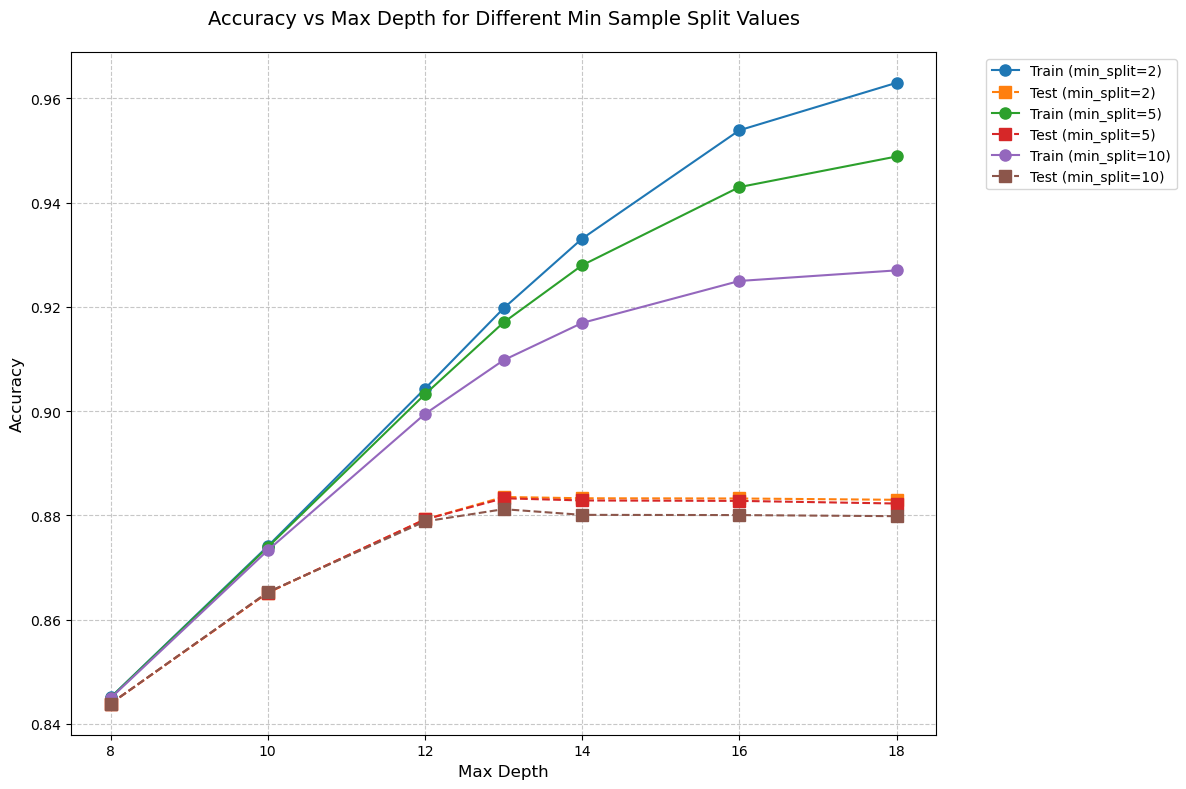

In [70]:
param_grid = {
    'min_sample_split': [2, 5, 10],
    'max_depth': [8, 10, 12, 13, 14, 16, 18],
}

best_params, best_score, all_results = grid_search_cv(X_train, X_test, y_train, y_test, param_grid)

results_df = visualize_overfitting_analysis(all_results)

print("\nBest Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

best_result = results_df.loc[results_df['test_accuracy'].idxmax()]
print(f"\nBest Model Performance:")
print(f"Train Accuracy: {best_result['train_accuracy']:.4f}")
print(f"Test Accuracy: {best_result['test_accuracy']:.4f}")
print(f"Difference (Train-Test): {best_result['difference']:.4f}")

### Visualising Tree

In [ ]:
def visualize_tree(tree, dot=None, parent=None, edge_label=""):
    if dot is None:
        dot = graphviz.Digraph()
    
    dot.node(name=str(id(tree)), label=node_label(tree))

    if parent is not None:
        dot.edge(str(id(parent)), str(id(tree)), label=edge_label)

    if tree.children:
        for i, child in enumerate(tree.children):
            if child is not None:  # Check if child exists
                edge = f"≤ {tree.thresholds[i]}" if i == 0 else \
                       (f"> {tree.thresholds[i-1]}" if i == len(tree.children) - 1 else 
                        f"{tree.thresholds[i-1]} < x ≤ {tree.thresholds[i]}")
                dot = visualize_tree(child, dot, tree, edge)

    return dot

def node_label(node):
    if node.value is not None:
        return f"Leaf: {node.value}"
    return f"Feature {node.feature_index}\nThresholds: {node.thresholds}\nInfo Gain: {round(node.info_gain, 3) if node.info_gain is not None else 'N/A'}"

In [55]:
dot = visualize_tree(clf.root)
dot.render("decision_tree", format="pdf", cleanup=True)
dot.view()

'decision_tree.pdf'